In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset

In [326]:
df = pd.read_csv('hour.csv', index_col='instant')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [328]:
categories_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'C', 'cnt']
date_columns = ['dteday']

In [329]:
mixed_indexes = np.random.permutation(len(df))

In [330]:
train_size = int(0.8 * len(df))
df_train = df.iloc[ mixed_indexes, : ][:train_size]
df_test = df.iloc[ mixed_indexes, : ][train_size:]
df_train.shape[0] + df_test.shape[0] == df.shape[0]

True

Future preprocessing for train. Pipeline for test preprocessing will be created later

# Data analysis

Drop casual and registered as terms of cnt

In [331]:
df_train = df_train.drop(['casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [332]:
X_train = df_train.drop(['cnt'], axis=1)
y_train = df_train.loc[:, 'cnt']
X_train.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,,
3725,2011-06-09,2,0,6,2,0,4,1,2,0.72,0.7121,0.84,0.1642
3332,2011-05-23,2,0,5,17,0,1,1,3,0.72,0.6818,0.70,0.3881
216,2011-01-10,1,0,1,6,0,1,1,1,0.12,0.1212,0.50,0.2836
13540,2012-07-23,3,1,7,8,0,1,1,1,0.72,0.6970,0.79,0.1045
529,2011-01-24,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.1343


In [333]:
y_train.head()

instant
3725       6
3332     429
216       31
13540    738
529        1
Name: cnt, dtype: int64

<AxesSubplot:>

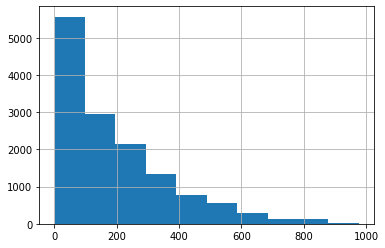

In [334]:
y_train.hist()

Drop dteday because in year, month

In [335]:
X_train = X_train.drop('dteday', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
3725,2,0,6,2,0,4,1,2,0.72,0.7121,0.84,0.1642
3332,2,0,5,17,0,1,1,3,0.72,0.6818,0.70,0.3881
216,1,0,1,6,0,1,1,1,0.12,0.1212,0.50,0.2836
13540,3,1,7,8,0,1,1,1,0.72,0.6970,0.79,0.1045
529,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.1343


## Correlation analysis

<AxesSubplot:>

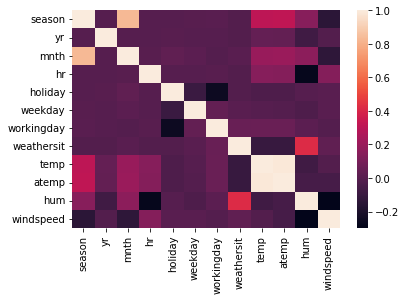

In [336]:
sns.heatmap(X_train.corr())

High correlation: season and month, temp and atemp. Drop temp

In [337]:
X_train = X_train.drop('temp', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
instant,,,,,,,,,,,
3725,2,0,6,2,0,4,1,2,0.7121,0.84,0.1642
3332,2,0,5,17,0,1,1,3,0.6818,0.70,0.3881
216,1,0,1,6,0,1,1,1,0.1212,0.50,0.2836
13540,3,1,7,8,0,1,1,1,0.6970,0.79,0.1045
529,1,0,1,4,0,1,1,1,0.0606,0.48,0.1343


In [338]:
pca = PCA(n_components=1)
temp = X_train.loc[:, ['season', 'mnth']]
temp['season_mnth'] = pca.fit_transform(temp)
X_train = X_train.drop(['season', 'mnth'], axis=1)
X_train['season_mnth'] = temp['season_mnth'] 
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,season_mnth
instant,,,,,,,,,,
3725,0,2,0,4,1,2,0.7121,0.84,0.1642,0.655062
3332,0,17,0,1,1,3,0.6818,0.70,0.3881,1.618862
216,0,6,0,1,1,1,0.1212,0.50,0.2836,5.740689
13540,1,8,0,1,1,1,0.6970,0.79,0.1045,-0.575364
529,0,4,0,1,1,1,0.0606,0.48,0.1343,5.740689


In [339]:
X_train.loc[:, 'hum'] = StandardScaler().fit_transform(X_train.loc[:, 'hum'].values.reshape(-1, 1))
X_train.loc[:, 'windspeed'] = StandardScaler().fit_transform(X_train.loc[:, 'windspeed'].values.reshape(-1, 1))
X_train.loc[:, 'season_mnth'] = StandardScaler().fit_transform(X_train.loc[:, 'season_mnth'].values.reshape(-1, 1))
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,season_mnth
instant,,,,,,,,,,
3725,0,2,0,4,1,2,0.7121,1.104612,-0.215573,0.184171
3332,0,17,0,1,1,3,0.6818,0.379169,1.612401,0.455143
216,0,6,0,1,1,1,0.1212,-0.657178,0.759238,1.613993
13540,1,8,0,1,1,1,0.6970,0.845525,-0.702979,-0.161763
529,0,4,0,1,1,1,0.0606,-0.760813,-0.459684,1.613993


## Dummies for categorical

In [340]:
df_weekday_dummies = pd.get_dummies(X_train['weekday'], prefix='weekday')
df_weekday_dummies

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,
3725,0,0,0,0,1,0,0
3332,0,1,0,0,0,0,0
216,0,1,0,0,0,0,0
13540,0,1,0,0,0,0,0
529,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
8811,0,0,0,0,0,0,1
3291,1,0,0,0,0,0,0
11876,0,0,1,0,0,0,0


In [341]:
X_train = pd.concat([X_train, df_weekday_dummies], axis=1).drop('weekday', axis=1)
X_train

,yr,hr,holiday,workingday,weathersit,atemp,hum,windspeed,season_mnth,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,
3725,0,2,0,1,2,0.7121,1.104612,-0.215573,0.184171,0,0,0,0,1,0,0
3332,0,17,0,1,3,0.6818,0.379169,1.612401,0.455143,0,1,0,0,0,0,0
216,0,6,0,1,1,0.1212,-0.657178,0.759238,1.613993,0,1,0,0,0,0,0
13540,1,8,0,1,1,0.6970,0.845525,-0.702979,-0.161763,0,1,0,0,0,0,0
529,0,4,0,1,1,0.0606,-0.760813,-0.459684,1.613993,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,1,22,0,0,1,0.4394,-1.278986,0.515127,1.613993,0,0,0,0,0,0,1
3291,0,0,0,0,1,0.5152,1.311881,-0.215573,0.455143,1,0,0,0,0,0,0
11876,1,0,0,1,2,0.5303,1.311881,-0.459684,0.455143,0,0,1,0,0,0,0


In [342]:
df_weathersit_dummies = pd.get_dummies(X_train['weathersit'], prefix='weathersit')
X_train = pd.concat([X_train, df_weathersit_dummies], axis=1).drop('weathersit', axis=1)
X_train

,yr,hr,holiday,workingday,atemp,hum,windspeed,season_mnth,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,
3725,0,2,0,1,0.7121,1.104612,-0.215573,0.184171,0,0,0,0,1,0,0,0,1,0,0
3332,0,17,0,1,0.6818,0.379169,1.612401,0.455143,0,1,0,0,0,0,0,0,0,1,0
216,0,6,0,1,0.1212,-0.657178,0.759238,1.613993,0,1,0,0,0,0,0,1,0,0,0
13540,1,8,0,1,0.6970,0.845525,-0.702979,-0.161763,0,1,0,0,0,0,0,1,0,0,0
529,0,4,0,1,0.0606,-0.760813,-0.459684,1.613993,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,1,22,0,0,0.4394,-1.278986,0.515127,1.613993,0,0,0,0,0,0,1,1,0,0,0
3291,0,0,0,0,0.5152,1.311881,-0.215573,0.455143,1,0,0,0,0,0,0,1,0,0,0
11876,1,0,0,1,0.5303,1.311881,-0.459684,0.455143,0,0,1,0,0,0,0,0,1,0,0


Function for data preprocessing

In [343]:
def data_preprocessing(X, pca):
    X = X.drop(['dteday', 'temp', 'casual', 'registered'], axis=1)
    temp = X.loc[:, ['season', 'mnth']]
    temp['season_mnth'] = pca.transform(temp)
    X = X.drop(['season', 'mnth'], axis=1)
    X['season_mnth'] = temp['season_mnth'] 
    
    X.loc[:, 'hum'] = StandardScaler().fit_transform(X.loc[:, 'hum'].values.reshape(-1, 1))
    X.loc[:, 'windspeed'] = StandardScaler().fit_transform(X.loc[:, 'windspeed'].values.reshape(-1, 1))
    X.loc[:, 'season_mnth'] = StandardScaler().fit_transform(X.loc[:, 'season_mnth'].values.reshape(-1, 1))
    
    df_weekday_dummies = pd.get_dummies(X['weekday'], prefix='weekday')
    X = pd.concat([X, df_weekday_dummies], axis=1).drop('weekday', axis=1)

    df_weathersit_dummies = pd.get_dummies(X['weathersit'], prefix='weathersit')
    X = pd.concat([X, df_weathersit_dummies], axis=1).drop('weathersit', axis=1)

    return X


In [344]:
X_test = df_test.drop(['cnt'], axis=1)
y_test = df_test.loc[:, 'cnt']

X_test

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
instant,,,,,,,,,,,,,,,
13333,2012-07-14,3,1,7,17,0,6,0,3,0.70,0.6667,0.79,0.1642,199,259
5717,2011-08-31,3,0,8,15,0,3,1,1,0.74,0.6515,0.40,0.1343,34,138
13851,2012-08-05,3,1,8,7,0,0,0,1,0.74,0.7121,0.74,0.2985,18,50
12700,2012-06-18,2,1,6,8,0,1,1,2,0.54,0.5152,0.83,0.1940,27,447
10417,2012-03-15,1,1,3,3,0,4,1,1,0.50,0.4848,0.63,0.0000,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,2011-06-23,3,0,6,23,0,4,1,1,0.70,0.6667,0.74,0.2836,15,90
1251,2011-02-25,1,0,2,6,0,5,1,3,0.34,0.3485,0.93,0.0896,0,11
12217,2012-05-29,2,1,5,5,0,2,1,1,0.66,0.6061,0.78,0.2239,1,32


In [345]:
X_test = data_preprocessing(X_test, pca)
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)

for i in X_test_cols:
    if i not in X_train_cols:
        print(i)

# Linear regression

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

First test

In [347]:
linear_reg = LinearRegression(n_jobs=8)

linear_reg.fit(X_train, y_train)

y_train_prediction = linear_reg.predict(X_train)
print(mean_absolute_error(y_train, y_train_prediction))

106.27037383771288


In [348]:
y_test_prediction = linear_reg.predict(X_test)
print(mean_absolute_error(y_test, y_test_prediction))

105.18481449702386


## Ridge

In [359]:
from sklearn.linear_model import Ridge, RidgeCV

In [364]:
ridge_reg = Ridge()

ridge_cv_reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge_cv_reg.fit(X_train, y_train)
y_train_prediction = ridge_cv_reg.predict(X_train)
print(mean_absolute_error(y_train, y_train_prediction))

106.26992680903244


In [365]:
y_test_prediction = ridge_cv_reg.predict(X_test)
print(mean_absolute_error(y_test, y_test_prediction))

105.18508332551781


## Elaslic Net

In [366]:
from sklearn.linear_model import ElasticNetCV

In [367]:
el_net_reg = ElasticNetCV(fit_intercept=True, alphas=[0.0125, 0.025, 0.05, .125, .25, .5, 1., 2., 4.])
el_net_reg.fit(X_train, y_train)
y_train_prediction = el_net_reg.predict(X_train)
print(mean_absolute_error(y_train, y_train_prediction))

106.23445387482154


In [368]:
y_test_prediction = el_net_reg.predict(X_test)
print(mean_absolute_error(y_test, y_test_prediction))

105.41616687004527
